In [1096]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [1097]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1098]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [1099]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718503 entries, 0 to 1718502
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 26.2 MB


In [1100]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1718498    0.13
1718499    0.12
1718500    0.13
1718501    0.12
1718502    0.13
Name: kWh, Length: 1718503, dtype: float64

In [1101]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1718498    0.13
1718499    0.12
1718500    0.13
1718501    0.12
1718502    0.13
Name: kWh, Length: 1718503, dtype: float64

In [1102]:
l=len(conso_data)-1
l

1718502

In [1103]:
conso_data['sec']=conso_data['Interval']/1000


In [1104]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1105]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1106]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718503 entries, 0 to 1718502
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 65.6 MB


In [1107]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1718498,27867,0.13,27.867,129.185058,42396131406
1718499,28825,0.12,28.825,124.891587,42396160231
1718500,28129,0.13,28.129,127.981798,42396188360
1718501,28666,0.12,28.666,125.584316,42396217026
1718502,28184,0.13,28.184,127.732047,42396245210


In [1108]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

42396245210000

In [1109]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 20, 6, 2, 292201)

In [1110]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1111]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [1112]:
base

datetime.datetime(2023, 8, 21, 20, 6, 2, 292201)

In [1113]:
# create column 'dates' with time cumulated time from base
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['dates']

0         2023-08-21 20:06:24.226201
1         2023-08-21 20:06:46.084201
2         2023-08-21 20:07:08.085201
3         2023-08-21 20:07:30.013201
4         2023-08-21 20:07:51.904201
                     ...            
1718498   2024-12-24 12:48:13.698201
1718499   2024-12-24 12:48:42.523201
1718500   2024-12-24 12:49:10.652201
1718501   2024-12-24 12:49:39.318201
1718502   2024-12-24 12:50:07.502201
Name: dates, Length: 1718503, dtype: datetime64[ns]

## créer les dates

In [1114]:
# create column 'days' avec format 'dd/mm/yy'
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:06:24.226201,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:06:46.084201,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:07:08.085201,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:07:30.013201,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:07:51.904201,21/08/23
...,...,...,...,...,...,...,...
1718498,27867,0.13,27.867,129.185058,42396131406,2024-12-24 12:48:13.698201,24/12/24
1718499,28825,0.12,28.825,124.891587,42396160231,2024-12-24 12:48:42.523201,24/12/24
1718500,28129,0.13,28.129,127.981798,42396188360,2024-12-24 12:49:10.652201,24/12/24
1718501,28666,0.12,28.666,125.584316,42396217026,2024-12-24 12:49:39.318201,24/12/24


### save conso_data with dates

In [1115]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [1116]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('24/12/24', 24, 12, 2024)

In [1117]:
here = now.strftime('%H:%M:%S')
here

'12:50:39'

In [1118]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1119]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 1716784 to 1718502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1719 non-null   int64         
 1   kWh        1719 non-null   float64       
 2   sec        1719 non-null   float64       
 3   Wh         1719 non-null   float64       
 4   cumul(ms)  1719 non-null   int64         
 5   dates      1719 non-null   datetime64[ns]
 6   days       1719 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 107.4+ KB


In [1120]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [1121]:
data = list(df_grp['kWh'])
print(data)

[0.703, 3.701, 4.235, 3.678, 4.125, 4.56, 3.608, 3.44, 3.507, 3.698, 3.62, 3.946, 4.254, 3.642, 3.632, 3.631, 3.321, 3.384, 4.155, 4.046, 4.058, 3.979, 3.473, 4.366, 3.83, 3.762, 4.187, 4.725, 3.943, 3.223, 3.171, 3.901, 3.776, 3.113, 3.779, 4.16, 3.681, 3.67, 4.687, 4.261, 4.472, 3.813, 3.441, 4.303, 3.876, 3.821, 3.477, 4.05, 3.685, 3.409, 4.157, 3.38, 3.853, 3.851, 3.635, 3.75, 4.273, 3.279, 3.885, 3.053, 2.055, 2.042, 2.391, 4.078, 3.681, 4.349, 3.59, 3.957, 3.751, 3.816, 4.103, 4.063, 3.701, 3.13, 3.766, 3.571, 3.607, 3.667, 3.681, 3.306, 3.839, 3.261, 3.746, 3.657, 4.07, 3.564, 3.419, 3.73, 4.121, 4.328, 3.941, 4.19, 4.234, 3.774, 3.92, 3.829, 3.928, 3.704, 4.029, 4.402, 3.881, 3.509, 3.681, 3.669, 3.351, 3.844, 3.994, 4.105, 3.5, 4.164, 3.595, 3.974, 4.624, 3.64, 3.499, 3.568, 4.066, 3.791, 4.083, 3.98, 3.754, 3.597, 5.099, 3.737, 3.761, 4.228, 4.144, 4.57, 4.469, 4.061, 3.683, 4.368, 4.735, 4.131, 4.796, 4.384, 3.681, 4.181, 3.74, 3.696, 3.488, 3.952, 3.691, 3.707, 3.653, 3.51,

In [1122]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1123]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1124]:
df = conso_data
len(df)

1718503

In [1125]:
period(p=2)

2023-08-22 02:12:38.029201	2023-08-22 09:16:53.649201	7h 4m 15s 	2000


In [1126]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.29483
dtype: float64

In [1127]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.492892
dtype: float64

In [1128]:
last=df_grp.iloc[-1]['kWh']
last

1.719

In [1129]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 1716784 to 1718502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1719 non-null   int64         
 1   kWh        1719 non-null   float64       
 2   sec        1719 non-null   float64       
 3   Wh         1719 non-null   float64       
 4   cumul(ms)  1719 non-null   int64         
 5   dates      1719 non-null   datetime64[ns]
 6   days       1719 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 107.4+ KB


In [1130]:
# select day
day = today
#day = '16/08/24'


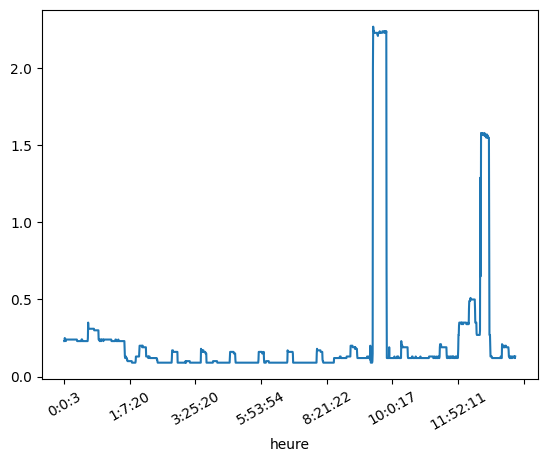

In [1131]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [1132]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:06:24.226201,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:06:46.084201,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:07:08.085201,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:07:30.013201,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:07:51.904201,21/08/23
...,...,...,...,...,...,...,...
1718498,27867,0.13,27.867,129.185058,42396131406,2024-12-24 12:48:13.698201,24/12/24
1718499,28825,0.12,28.825,124.891587,42396160231,2024-12-24 12:48:42.523201,24/12/24
1718500,28129,0.13,28.129,127.981798,42396188360,2024-12-24 12:49:10.652201,24/12/24
1718501,28666,0.12,28.666,125.584316,42396217026,2024-12-24 12:49:39.318201,24/12/24


In [1133]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:3,15577,0.23,15.577,231.109970,42350041243,2024-12-24 00:00:03.535201,24/12/24
0:0:18,15355,0.23,15.355,234.451319,42350056598,2024-12-24 00:00:18.890201,24/12/24
0:0:33,14625,0.25,14.625,246.153846,42350071223,2024-12-24 00:00:33.515201,24/12/24
0:0:48,15019,0.24,15.019,239.696385,42350086242,2024-12-24 00:00:48.534201,24/12/24
0:1:3,14912,0.24,14.912,241.416309,42350101154,2024-12-24 00:01:03.446201,24/12/24
...,...,...,...,...,...,...,...
12:48:13,27867,0.13,27.867,129.185058,42396131406,2024-12-24 12:48:13.698201,24/12/24
12:48:42,28825,0.12,28.825,124.891587,42396160231,2024-12-24 12:48:42.523201,24/12/24
12:49:10,28129,0.13,28.129,127.981798,42396188360,2024-12-24 12:49:10.652201,24/12/24


In [1134]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 23/12/24 5.098
Min : 21/12/24 2.982


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1716784,15577,0.23,15.577,231.109970,42350041243,2024-12-24 00:00:03.535201,24/12/24,0:0:3
1716785,15355,0.23,15.355,234.451319,42350056598,2024-12-24 00:00:18.890201,24/12/24,0:0:18
1716786,14625,0.25,14.625,246.153846,42350071223,2024-12-24 00:00:33.515201,24/12/24,0:0:33
1716787,15019,0.24,15.019,239.696385,42350086242,2024-12-24 00:00:48.534201,24/12/24,0:0:48
1716788,14912,0.24,14.912,241.416309,42350101154,2024-12-24 00:01:03.446201,24/12/24,0:1:3
...,...,...,...,...,...,...,...,...
1718498,27867,0.13,27.867,129.185058,42396131406,2024-12-24 12:48:13.698201,24/12/24,12:48:13
1718499,28825,0.12,28.825,124.891587,42396160231,2024-12-24 12:48:42.523201,24/12/24,12:48:42
1718500,28129,0.13,28.129,127.981798,42396188360,2024-12-24 12:49:10.652201,24/12/24,12:49:10
1718501,28666,0.12,28.666,125.584316,42396217026,2024-12-24 12:49:39.318201,24/12/24,12:49:39


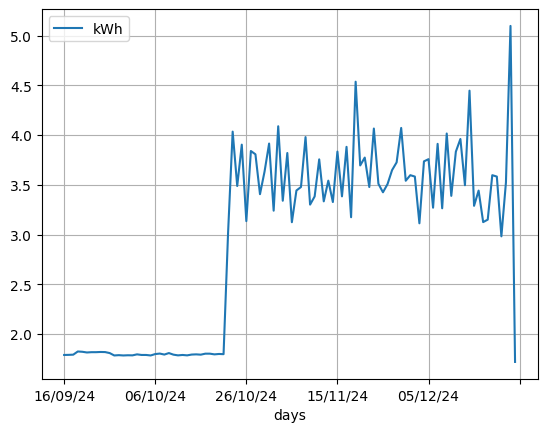

In [1135]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-12-24 00:00:03.535201	2024-12-24 08:20:42.426201	8h 20m 38s 	1000
2024-12-24 08:20:42.426201	2024-12-24 12:50:07.502201	4h 29m 25s 	719
<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 1716784 to 1718502
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1719 non-null   int64         
 1   kWh        1719 non-null   float64       
 2   sec        1719 non-null   float64       
 3   Wh         1719 non-null   float64       
 4   cumul(ms)  1719 non-null   int64         
 5   dates      1719 non-null   datetime64[ns]
 6   days       1719 non-null   object        
 7   heure      1719 non-null   object        
 8   hours      1719 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 134.3+ KB


('24/12/24', <Axes: xlabel='hours'>)

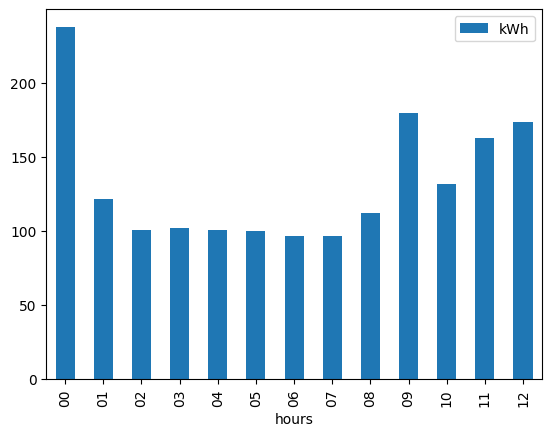

In [1136]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [1137]:
df_grp

,kWh
days,
21/08/23,0.703
22/08/23,3.701
23/08/23,4.235
24/08/23,3.678
25/08/23,4.125
...,...
20/12/24,3.583
21/12/24,2.982
22/12/24,3.524


In [1138]:
# select number of days to display
span = 30
#df_grp.tail(span)


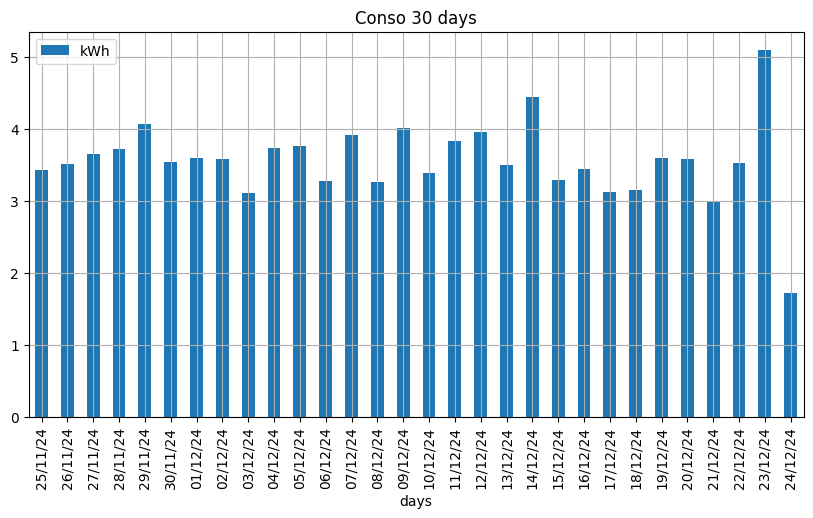

In [1139]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


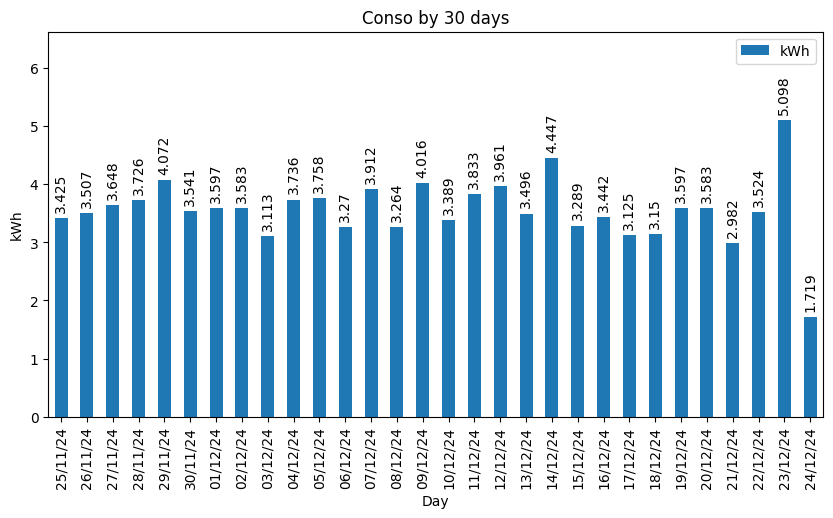

In [1140]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [1141]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
25/11/24    3.425
26/11/24    3.507
27/11/24    3.648
28/11/24    3.726
29/11/24    4.072
30/11/24    3.541
01/12/24    3.597
02/12/24    3.583
03/12/24    3.113
04/12/24    3.736
05/12/24    3.758
06/12/24    3.270
07/12/24    3.912
08/12/24    3.264
09/12/24    4.016
10/12/24    3.389
11/12/24    3.833
12/12/24    3.961
13/12/24    3.496
14/12/24    4.447
15/12/24    3.289
16/12/24    3.442
17/12/24    3.125
18/12/24    3.150
19/12/24    3.597
20/12/24    3.583
21/12/24    2.982
22/12/24    3.524
23/12/24    5.098
24/12/24    1.719
Name: kWh, dtype: float64

In [1142]:
x_labels=df_grp.tail(span).index
x_labels

Index(['25/11/24', '26/11/24', '27/11/24', '28/11/24', '29/11/24', '30/11/24',
       '01/12/24', '02/12/24', '03/12/24', '04/12/24', '05/12/24', '06/12/24',
       '07/12/24', '08/12/24', '09/12/24', '10/12/24', '11/12/24', '12/12/24',
       '13/12/24', '14/12/24', '15/12/24', '16/12/24', '17/12/24', '18/12/24',
       '19/12/24', '20/12/24', '21/12/24', '22/12/24', '23/12/24', '24/12/24'],
      dtype='object', name='days')

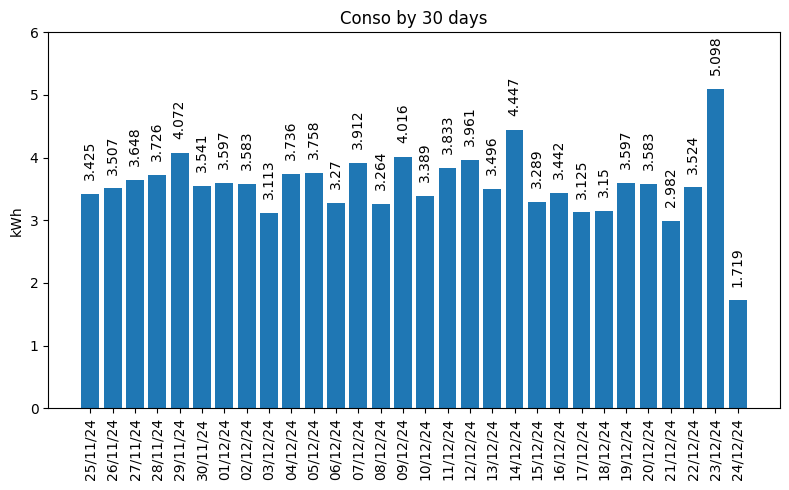

In [1143]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [1144]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

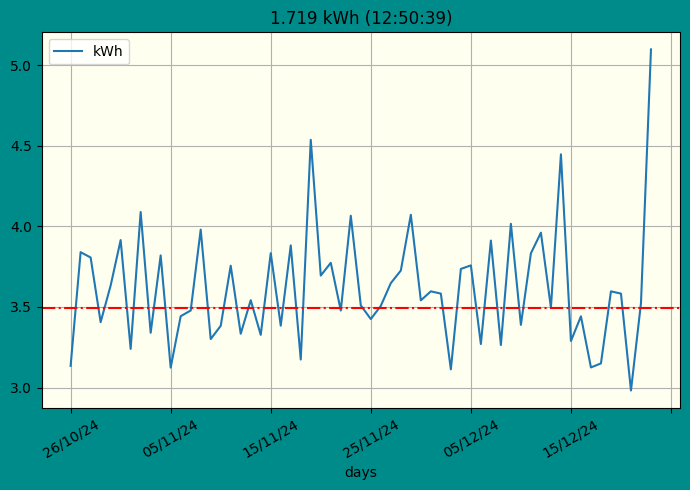

In [1145]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

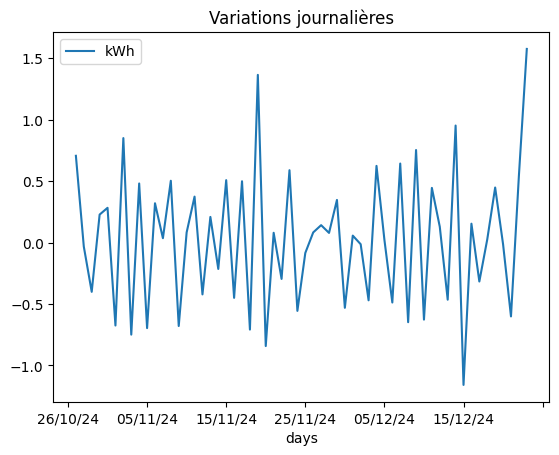

In [1146]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [1147]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:06:24.226201,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:06:46.084201,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:07:08.085201,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:07:30.013201,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:07:51.904201,21/08/23,20
...,...,...,...,...,...,...,...,...
1718498,27867,0.13,27.867,129.185058,42396131406,2024-12-24 12:48:13.698201,24/12/24,12
1718499,28825,0.12,28.825,124.891587,42396160231,2024-12-24 12:48:42.523201,24/12/24,12
1718500,28129,0.13,28.129,127.981798,42396188360,2024-12-24 12:49:10.652201,24/12/24,12
1718501,28666,0.12,28.666,125.584316,42396217026,2024-12-24 12:49:39.318201,24/12/24,12


In [1148]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [1149]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [1150]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [1151]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1152]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,703
22/08/23,3701
23/08/23,4235
24/08/23,3678
25/08/23,4125
...,...
20/12/24,3583
21/12/24,2982
22/12/24,3524


In [1153]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:06:24.226201,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:06:46.084201,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:07:08.085201,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:07:30.013201,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:07:51.904201,21/08/23,20
...,...,...,...,...,...,...,...,...
1718498,27867,0.13,27.867,129.185058,42396131406,2024-12-24 12:48:13.698201,24/12/24,12
1718499,28825,0.12,28.825,124.891587,42396160231,2024-12-24 12:48:42.523201,24/12/24,12
1718500,28129,0.13,28.129,127.981798,42396188360,2024-12-24 12:49:10.652201,24/12/24,12
1718501,28666,0.12,28.666,125.584316,42396217026,2024-12-24 12:49:39.318201,24/12/24,12


In [1154]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 20    0        21/08/23    20  0.16
               1        21/08/23    20  0.16
               2        21/08/23    20  0.16
               3        21/08/23    20  0.16
               4        21/08/23    20  0.16
...                          ...   ...   ...
24/12/24 12    1718498  24/12/24    12  0.13
               1718499  24/12/24    12  0.12
               1718500  24/12/24    12  0.13
               1718501  24/12/24    12  0.12
               1718502  24/12/24    12  0.13

[1718503 rows x 3 columns]

In [1155]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [1156]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/2

In [1157]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,703,703
22/08/23,3701,3701
23/08/23,4235,4235
24/08/23,3678,3678
25/08/23,4125,4125
...,...,...
20/12/24,3583,3583
21/12/24,2982,2982
22/12/24,3524,3524


In [1158]:
grp_by_day['kWh'].cumsum()

days
21/08/23        703
22/08/23       4404
23/08/23       8639
24/08/23      12317
25/08/23      16442
             ...   
20/12/24    1705180
21/12/24    1708162
22/12/24    1711686
23/12/24    1716784
24/12/24    1718503
Name: kWh, Length: 492, dtype: int64

In [1159]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 20     159
         21     284
         22     130
         23     130
22/08/23 00     130
...             ...
24/12/24 08     112
         09     180
         10     132
         11     163
         12     174

[11777 rows x 1 columns]

In [1160]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  20           159
          21           443
          22           573
          23           703
22/08/23  00           833
                    ...   
24/12/24  08       1717854
          09       1718034
          10       1718166
          11       1718329
          12       1718503
Name: kWh, Length: 11777, dtype: int64

In [1161]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 20     159     159    NaN
         21     284     443  125.0
         22     130     573 -154.0
         23     130     703    0.0
22/08/23 00     130     130    NaN
...             ...     ...    ...
24/12/24 08     112    1070   15.0
         09     180    1250   68.0
         10     132    1382  -48.0
         11     163    1545   31.0
         12     174    1719   11.0

[11777 rows x 3 columns]

In [1162]:
today, grp_by_dayhours.loc[today]

('24/12/24',
        kWh  cumsum   diff
 hours                    
 00     238     238    NaN
 01     122     360 -116.0
 02     101     461  -21.0
 03     102     563    1.0
 04     101     664   -1.0
 05     100     764   -1.0
 06      97     861   -3.0
 07      97     958    0.0
 08     112    1070   15.0
 09     180    1250   68.0
 10     132    1382  -48.0
 11     163    1545   31.0
 12     174    1719   11.0)

Text(0.5, 1.0, 'Cumul journalier')

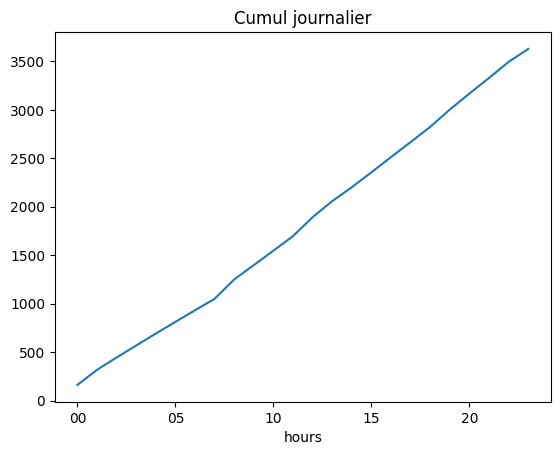

In [1163]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

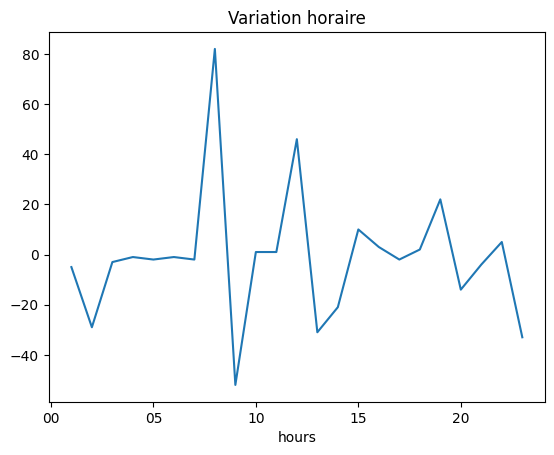

In [1164]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [1165]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

492

In [1166]:
df_grp.tail(n)['kWh'].describe()


count    492.000000
mean       3.492892
std        0.693113
min        0.703000
25%        3.336750
50%        3.624500
75%        3.868750
max        5.099000
Name: kWh, dtype: float64

In [1167]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '492 days')

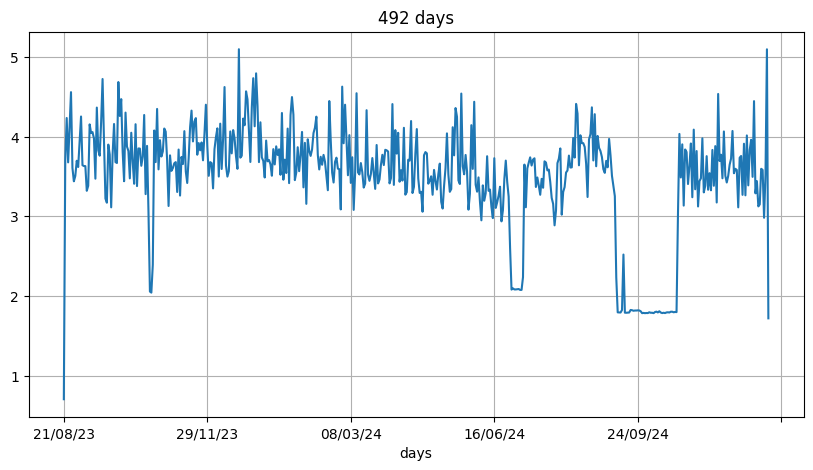

In [1168]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '400 days')

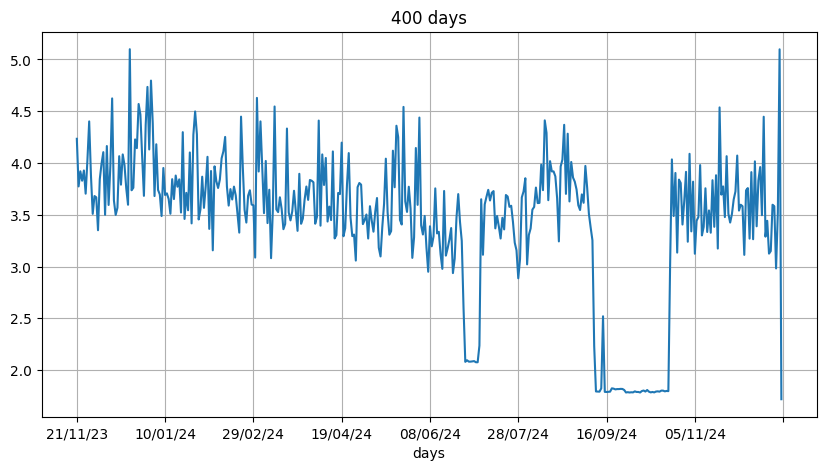

In [1312]:
# show conso in span 
span = 400
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1170]:
df_grp['kWh']

days
21/08/23    0.703
22/08/23    3.701
23/08/23    4.235
24/08/23    3.678
25/08/23    4.125
            ...  
20/12/24    3.583
21/12/24    2.982
22/12/24    3.524
23/12/24    5.098
24/12/24    1.719
Name: kWh, Length: 492, dtype: float64

In [1171]:
df_grp.describe()

,kWh
count,492.000000
mean,3.492892
std,0.693113
min,0.703000
25%,3.336750
50%,3.624500
75%,3.868750
max,5.099000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

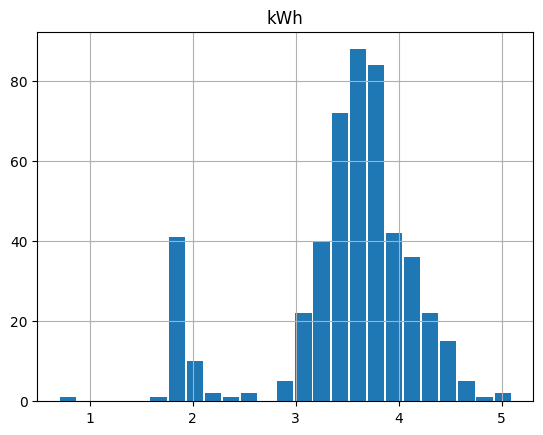

In [1172]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [1173]:
df_grp.tail(span)['kWh']

days
16/09/24    1.789
17/09/24    1.790
18/09/24    1.792
19/09/24    1.824
20/09/24    1.821
            ...  
20/12/24    3.583
21/12/24    2.982
22/12/24    3.524
23/12/24    5.098
24/12/24    1.719
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [1174]:
day

'24/12/24'

In [1175]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,238,238,NaN
01,122,360,-116.0
02,101,461,-21.0
03,102,563,1.0
04,101,664,-1.0
05,100,764,-1.0
06,97,861,-3.0
07,97,958,0.0
08,112,1070,15.0


In [1176]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


13

In [1177]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 14)

In [1178]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [1179]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [1180]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
Name: days, dtype: float64

In [1181]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [1182]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 00 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     13 non-null     int64  
 1   cumsum  13 non-null     int64  
 2   diff    12 non-null     float64
 3   days    13 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 520.0+ bytes


In [1183]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
Name: days, dtype: float64

In [1184]:
day

'24/12/24'

In [1185]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,238,238,NaN,1.0
01,122,360,-116.0,2.0
02,101,461,-21.0,3.0
03,102,563,1.0,4.0
04,101,664,-1.0,5.0
05,100,764,-1.0,6.0
06,97,861,-3.0,7.0
07,97,958,0.0,8.0
08,112,1070,15.0,9.0


Text(0.5, 1.0, '24/12/24')

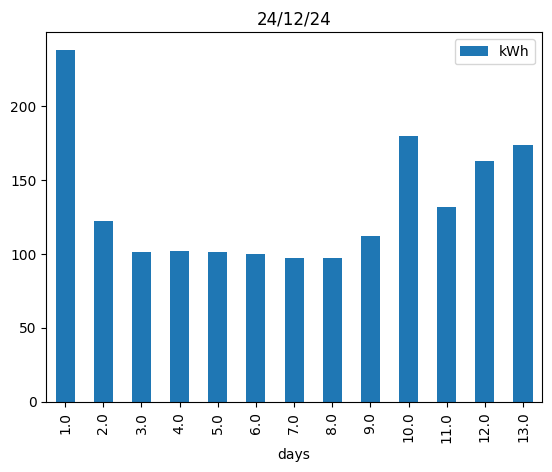

In [1186]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [1187]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'],
      dtype='object', name='hours')

# Conso du jour


In [1188]:
groupedbyhour.count()

,kWh
hours,
00,238
01,122
02,101
03,102
04,101
05,100
06,97
07,97
08,112


In [1189]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    152
01    166
02    152
03    169
04    166
05    146
06    137
07    117
08    128
09    131
10    114
11    130
12    124
13    176
14    156
15    138
16    157
17    986
18    227
19    290
20    293
21    316
22    325
23    203
Name: kWh, dtype: int64

In [1190]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

294.203

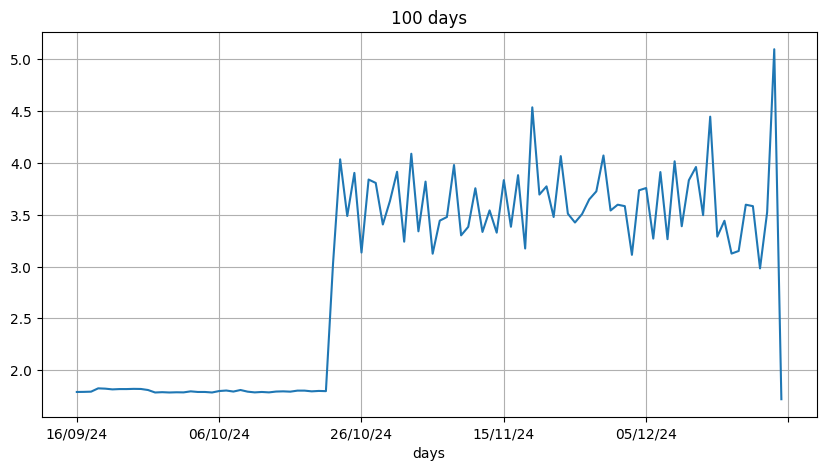

In [1191]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [1192]:
df_grp.tail(1)

,kWh
days,
24/12/24,1.719


In [1193]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

1.719

In [1194]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

81.34729170799255


# Today

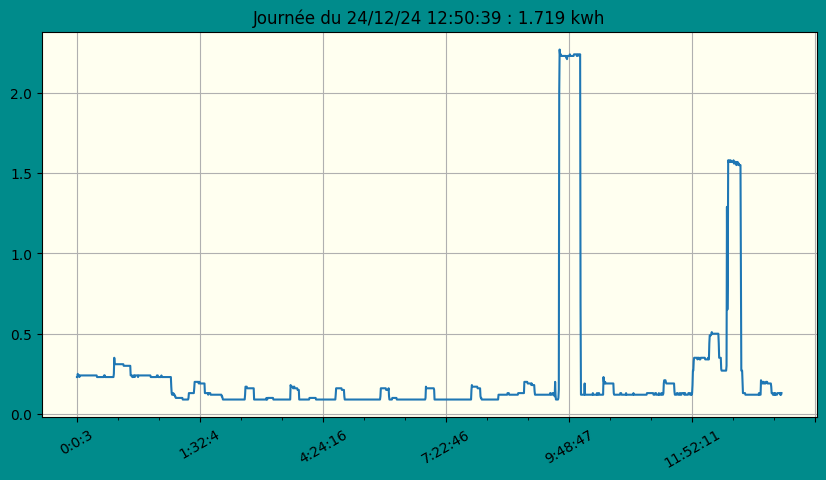

In [1195]:
show(today,bgcolor='ivory')

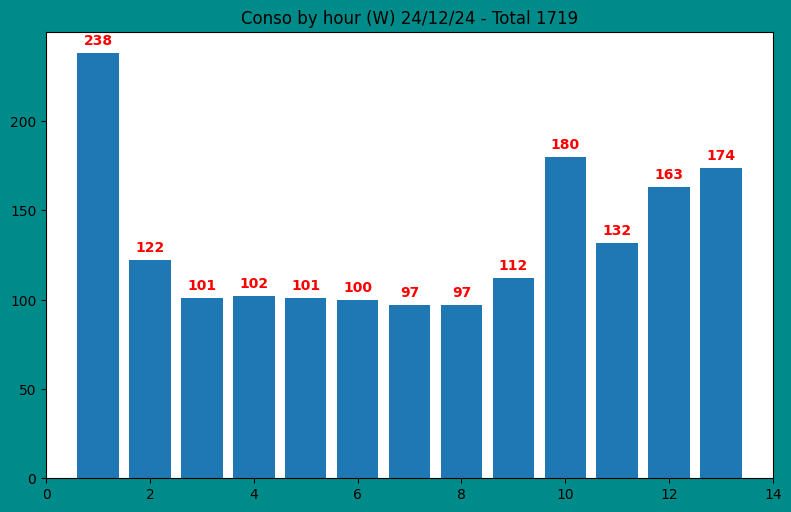

In [1196]:
conso_by_hour(today)

In [1197]:
day = '23/12/24'

('23/12/24', None)

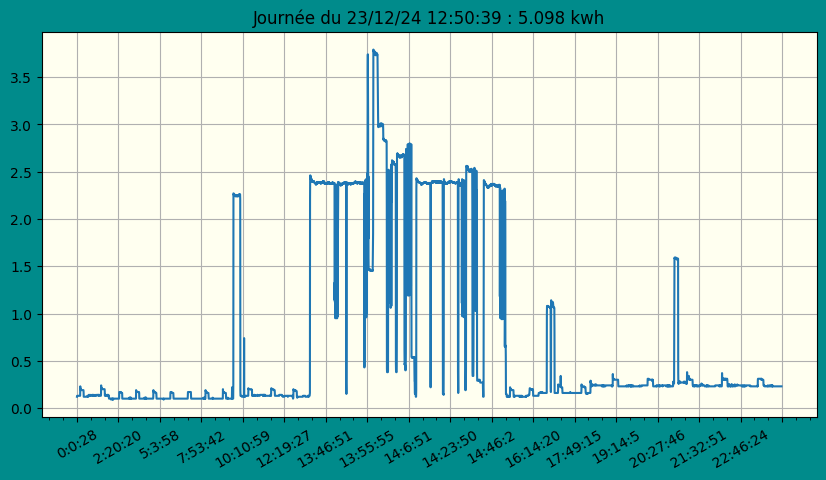

In [1198]:
day, show(day,bgcolor='ivory')

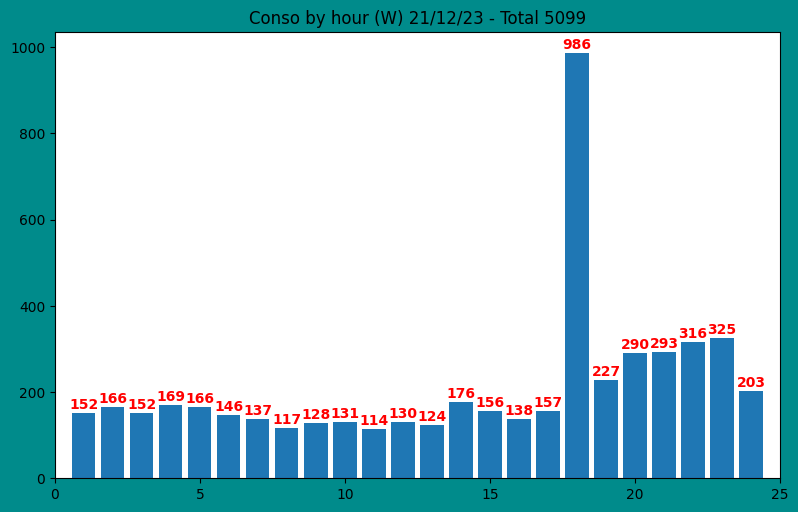

In [1230]:
conso_by_hour(day)

In [1231]:
maxday

'21/12/23'

('21/12/23', None)

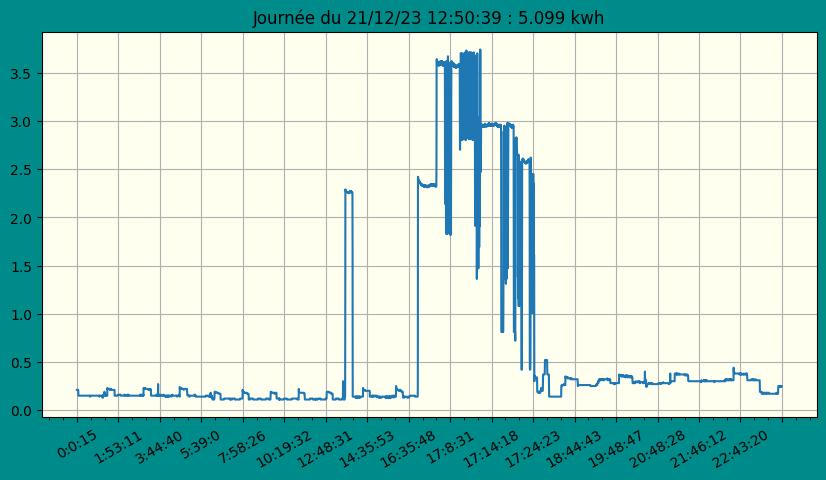

In [1284]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

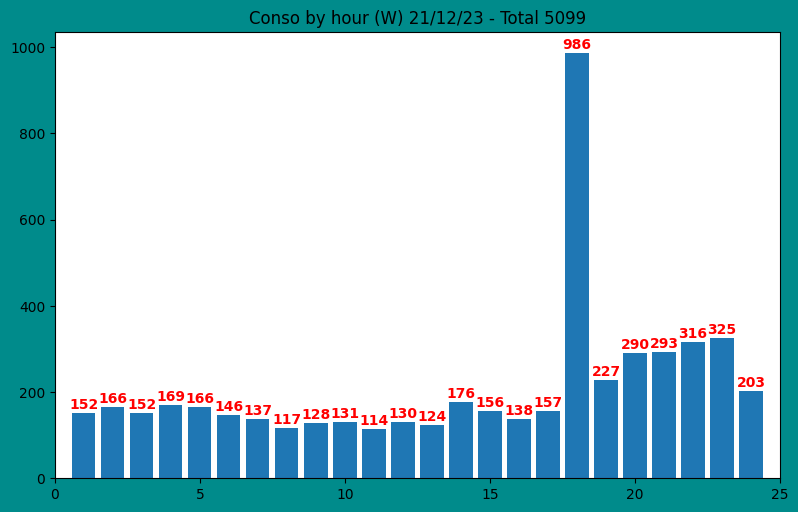

In [1285]:
conso_by_hour(day)

In [1286]:
sum(data)

5099

In [1287]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,238,238,NaN,1.0
01,122,360,-116.0,2.0
02,101,461,-21.0,3.0
03,102,563,1.0,4.0
04,101,664,-1.0,5.0
05,100,764,-1.0,6.0
06,97,861,-3.0,7.0
07,97,958,0.0,8.0
08,112,1070,15.0,9.0


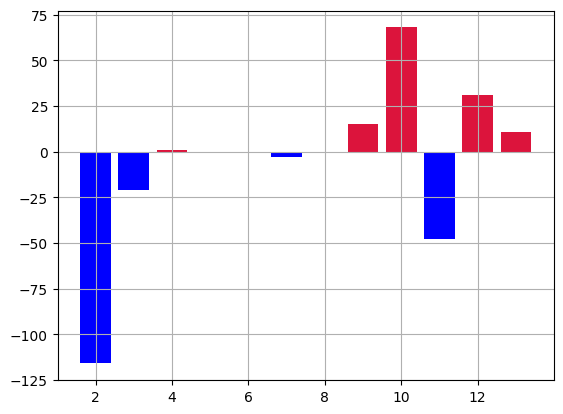

In [1288]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [1289]:
data

hours
00    152
01    166
02    152
03    169
04    166
05    146
06    137
07    117
08    128
09    131
10    114
11    130
12    124
13    176
14    156
15    138
16    157
17    986
18    227
19    290
20    293
21    316
22    325
23    203
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

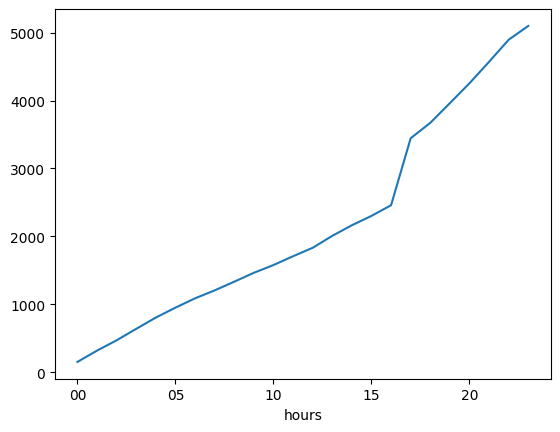

In [1290]:
data.cumsum().plot()


<Axes: xlabel='hours'>

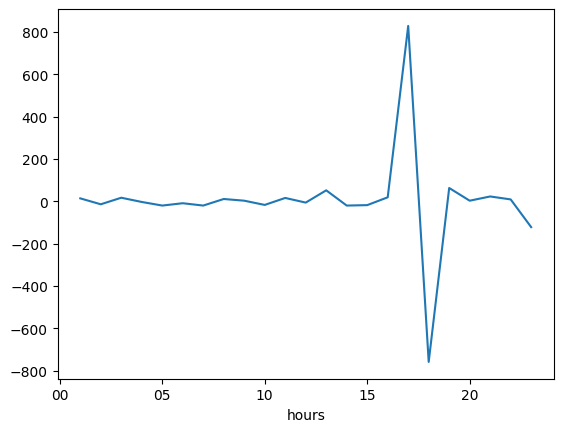

In [1291]:
# evolution par heure
data.diff().plot()

In [1292]:
data.diff().describe()

count     23.000000
mean       2.217391
std      242.032296
min     -759.000000
25%      -17.500000
50%        3.000000
75%       16.500000
max      829.000000
Name: kWh, dtype: float64

<Axes: >

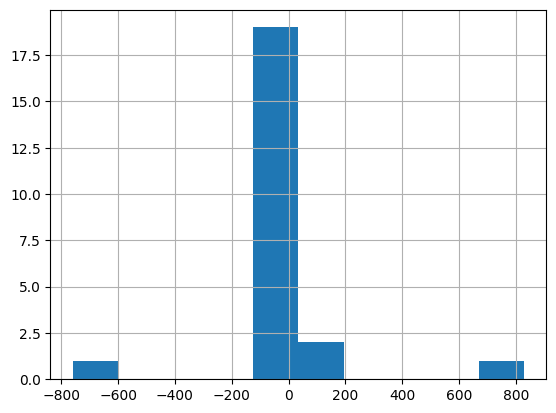

In [1293]:
data.diff().hist()

# Test sauvegarde

In [1294]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',


In [1295]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1296]:
#conso_byhour(day)

In [1297]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


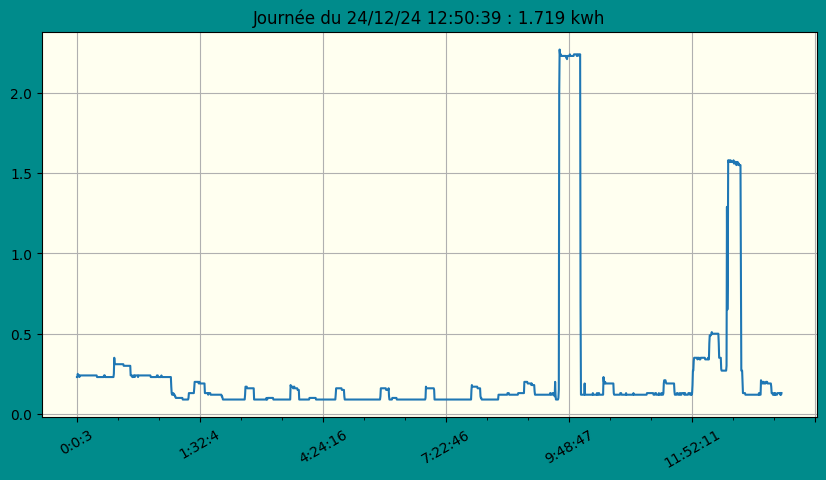

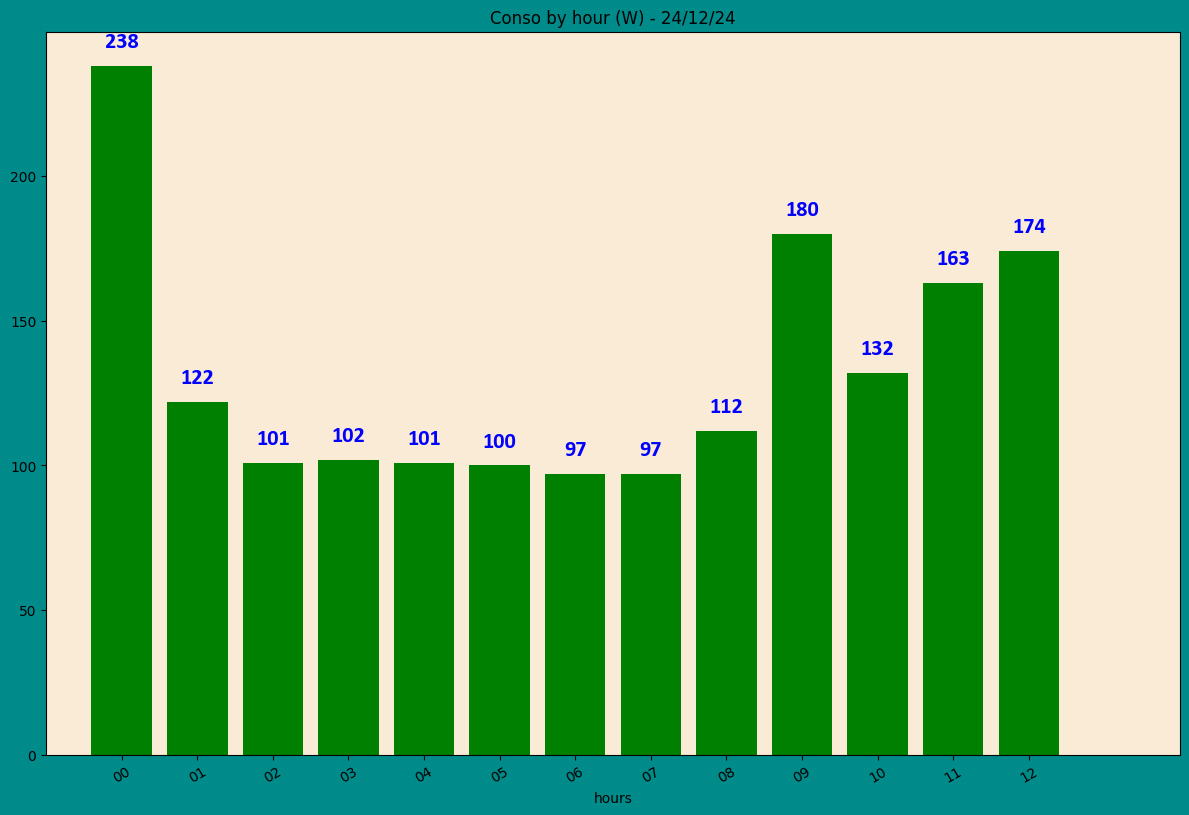

In [1298]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1299]:
month.describe()


count    30.000000
mean      3.619800
std       0.423139
min       2.982000
25%       3.398000
50%       3.562000
75%       3.752500
max       5.098000
Name: kWh, dtype: float64

<Axes: >

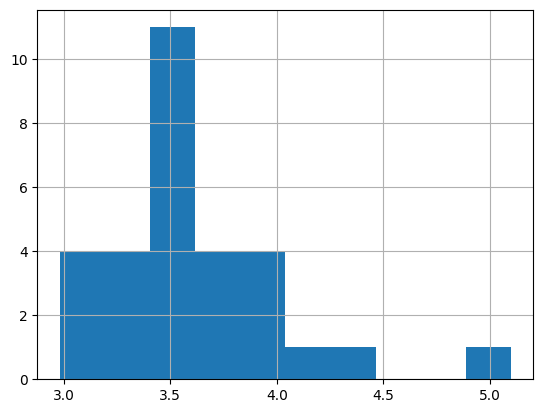

In [1300]:
month.hist()

<Axes: xlabel='days'>

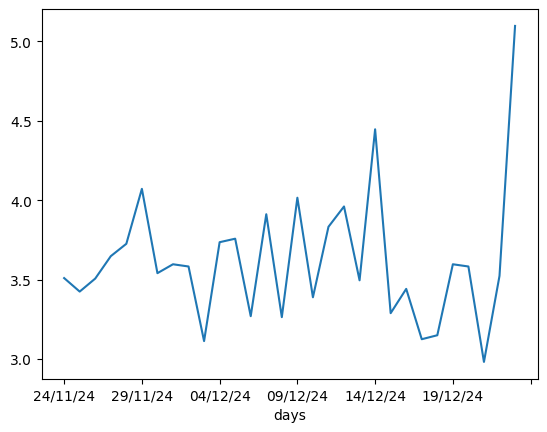

In [1301]:
month.plot()

In [1302]:
# date with max conso in 1 month
month.idxmax()

'23/12/24'

In [1303]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'23/12/24'

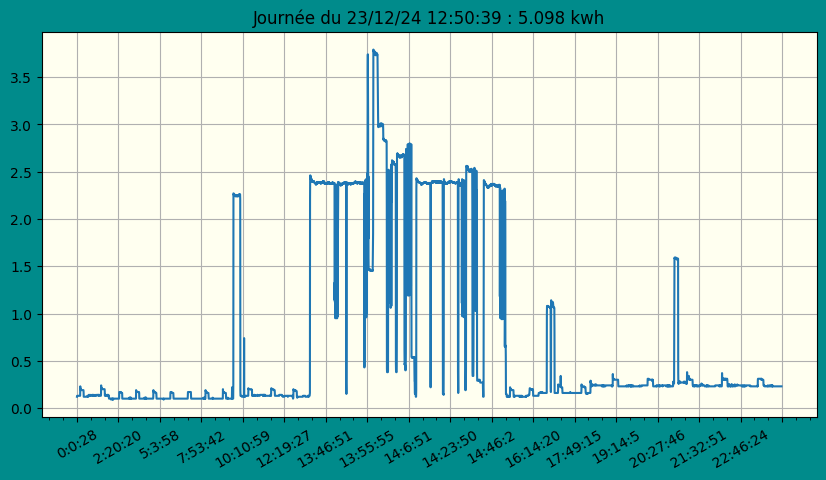

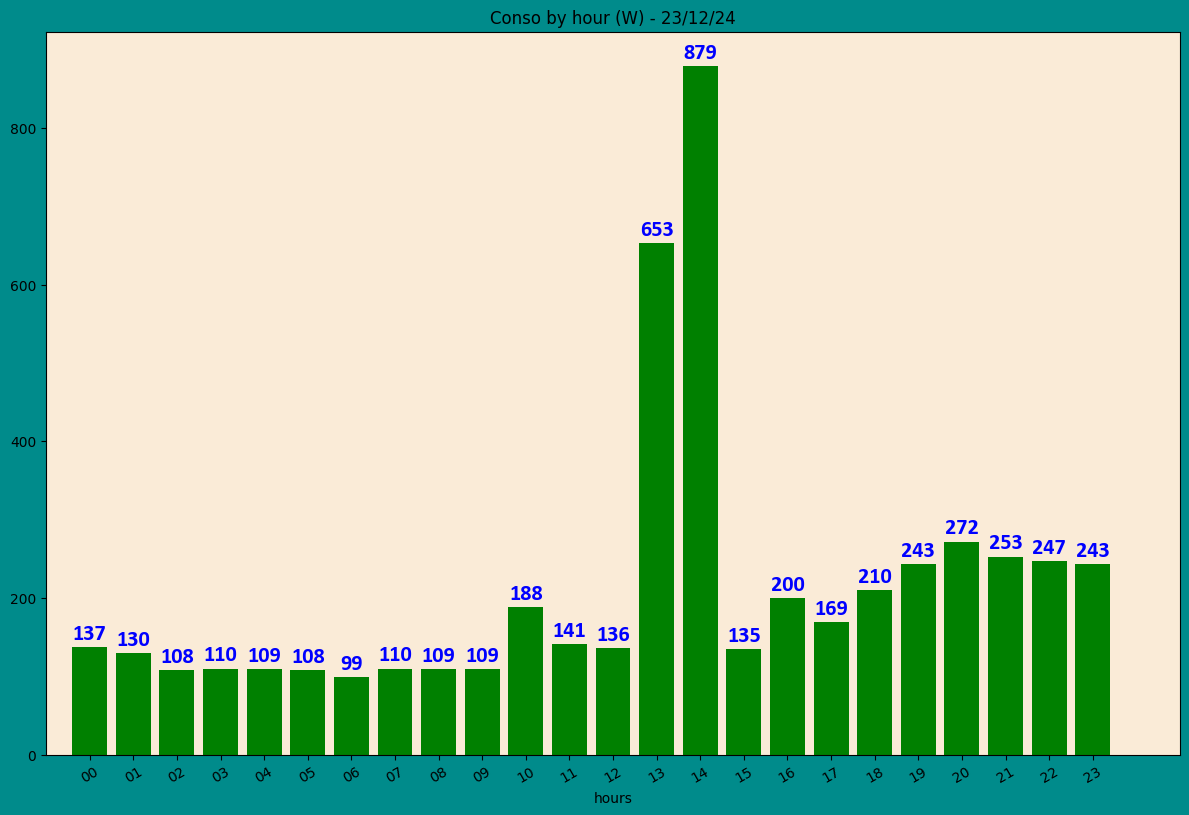

In [1304]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1305]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 20     159     159    NaN   NaN
         21     284     443  125.0   NaN
         22     130     573 -154.0   NaN
         23     130     703    0.0   NaN
22/08/23 00     130     130    NaN   NaN
...             ...     ...    ...   ...
24/12/24 08     112    1070   15.0   9.0
         09     180    1250   68.0  10.0
         10     132    1382  -48.0  11.0
         11     163    1545   31.0  12.0
         12     174    1719   11.0  13.0

[11777 rows x 4 columns]

In [1306]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,137,137,NaN,NaN
01,130,267,-7.0,NaN
02,108,375,-22.0,NaN
03,110,485,2.0,NaN
04,109,594,-1.0,NaN
05,108,702,-1.0,NaN
06,99,801,-9.0,NaN
07,110,911,11.0,NaN
08,109,1020,-1.0,NaN


In [1307]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

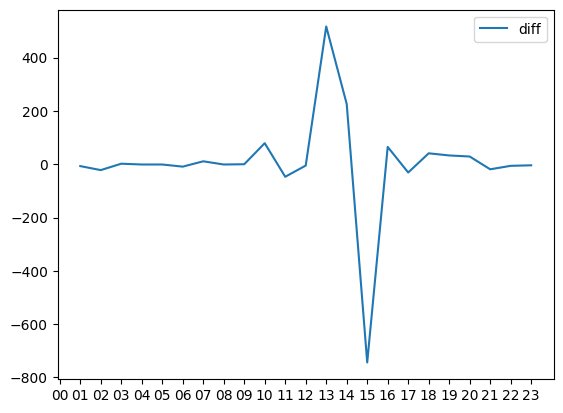

In [1308]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

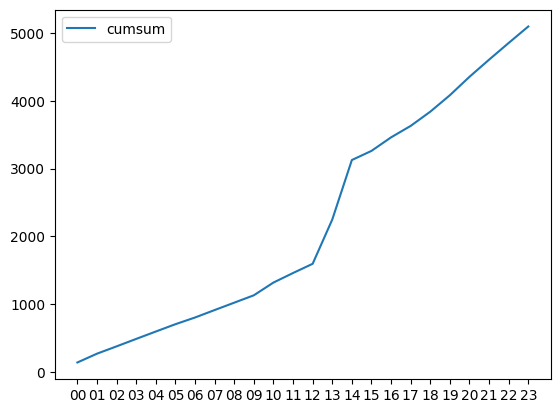

In [1309]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [1310]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB